In [95]:
%pylab inline
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy import arange,array,ones,linalg
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import warnings

Populating the interactive namespace from numpy and matplotlib


In [96]:
def f(x, reg):
    return reg[0]+ x*reg[1]

In [97]:
import warnings
warnings.filterwarnings('ignore')

               id        date  vaccines  tests  confirmed  recovered  deaths  \
0        0007cb93  2020-03-30       NaN    NaN        1.0        NaN     0.0   
1        0007cb93  2020-03-31       NaN    NaN        4.0        NaN     0.0   
2        0007cb93  2020-04-01       NaN    NaN        4.0        NaN     0.0   
3        0007cb93  2020-04-02       NaN    NaN        4.0        NaN     0.0   
4        0007cb93  2020-04-03       NaN    NaN        5.0        NaN     0.0   
...           ...         ...       ...    ...        ...        ...     ...   
1099058  ffd2a0fb  2021-03-05       NaN    NaN     3250.0        NaN    39.0   
1099059  ffd2a0fb  2021-03-06       NaN    NaN     3250.0        NaN    39.0   
1099060  ffd2a0fb  2021-03-07       NaN    NaN     3250.0        NaN    39.0   
1099061  ffd2a0fb  2021-03-08       NaN    NaN     3261.0        NaN    39.0   
1099062  ffd2a0fb  2021-03-09       NaN    NaN     3263.0        NaN    39.0   

         hosp  vent  icu  ...  administ

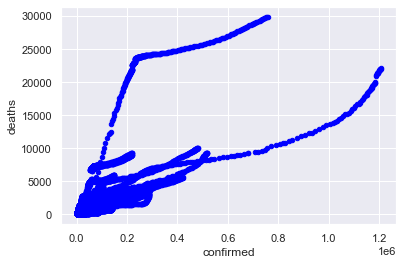

In [110]:
dataFrame=pd.read_csv('data/Covid19USA.csv')

ax= dataFrame.plot(kind='scatter',s=1.4, x="confirmed",y="deaths", color = 'blue');
#x0,x1=xlim()
#ax.plot([x0,x1],[0,0], color = 'red');
print (dataFrame)
print(dataFrame.head(5))

In [112]:
print (dataFrame.shape)
print (dataFrame.columns)
print (dataFrame.head())
type(dataFrame)

(1099063, 38)
Index(['id', 'date', 'vaccines', 'tests', 'confirmed', 'recovered', 'deaths',
       'hosp', 'vent', 'icu', 'population', 'school_closing',
       'workplace_closing', 'cancel_events', 'gatherings_restrictions',
       'transport_closing', 'stay_home_restrictions',
       'internal_movement_restrictions', 'international_movement_restrictions',
       'information_campaigns', 'testing_policy', 'contact_tracing',
       'stringency_index', 'iso_alpha_3', 'iso_alpha_2', 'iso_numeric',
       'currency', 'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'key', 'key_numeric', 'key_google_mobility',
       'key_apple_mobility', 'key_alpha_2'],
      dtype='object')
         id        date  vaccines  tests  confirmed  recovered  deaths  hosp  \
0  0007cb93  2020-03-30       NaN    NaN        1.0        NaN     0.0   NaN   
1  0007cb93  2020-03-31       NaN    NaN       

pandas.core.frame.DataFrame

In [119]:
dataFrame['confirmed'] = pd.to_numeric(dataFrame['confirmed'])     
dataFrame['deaths'] = pd.to_numeric(dataFrame['deaths'])

print(type(dataFrame))
print(dataFrame)

<class 'pandas.core.frame.DataFrame'>
               id        date  vaccines  tests  confirmed  recovered  deaths  \
0        0007cb93  2020-03-30       NaN    NaN        1.0        NaN     0.0   
1        0007cb93  2020-03-31       NaN    NaN        4.0        NaN     0.0   
2        0007cb93  2020-04-01       NaN    NaN        4.0        NaN     0.0   
3        0007cb93  2020-04-02       NaN    NaN        4.0        NaN     0.0   
4        0007cb93  2020-04-03       NaN    NaN        5.0        NaN     0.0   
...           ...         ...       ...    ...        ...        ...     ...   
1099058  ffd2a0fb  2021-03-05       NaN    NaN     3250.0        NaN    39.0   
1099059  ffd2a0fb  2021-03-06       NaN    NaN     3250.0        NaN    39.0   
1099060  ffd2a0fb  2021-03-07       NaN    NaN     3250.0        NaN    39.0   
1099061  ffd2a0fb  2021-03-08       NaN    NaN     3261.0        NaN    39.0   
1099062  ffd2a0fb  2021-03-09       NaN    NaN     3263.0        NaN    39.0   

 

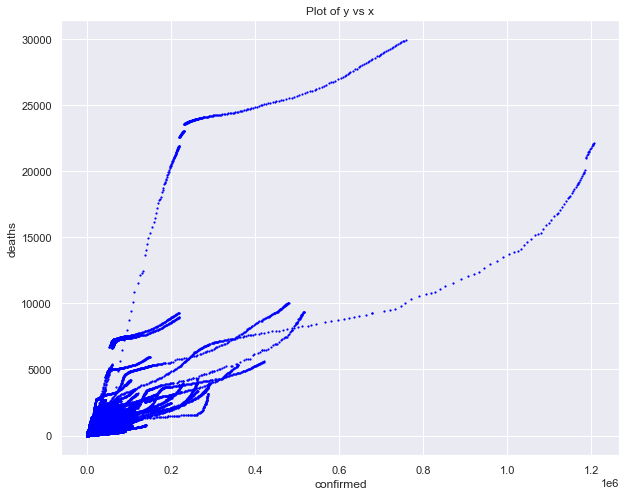

In [101]:
data_numeric = dataFrame.select_dtypes(include=['int64', 'int64'])
dataFrame=pd.read_csv('data/Covid19USA.csv')

# Create Graph
ax= dataFrame.plot(kind='scatter',s=1.4,x='confirmed',y='deaths',figsize=[10,8], title='Plot of y vs x', color = 'blue');

In [102]:
x = dataFrame['confirmed'].values.reshape(-1,1)
y = dataFrame['deaths'].values.reshape(-1,1)

In [108]:
model = LinearRegression().fit(x, y)
predictions = model.predict(x)
print("The linear model is: y = {:.5} + {:.5}x".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(x, y, c='black')
plt.plot(x, predictions, c='blue', linewidth=2)
plt.xlabel("confirmed")
plt.ylabel("deaths")
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[1.000e+00 4.000e+00 4.000e+00 ... 3.250e+03 3.261e+03 3.263e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [109]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.